In [49]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline


In [50]:
X,Y=make_circles(n_samples=500,noise=0.02)

In [51]:
print(X.shape,Y.shape)

((500, 2), (500,))


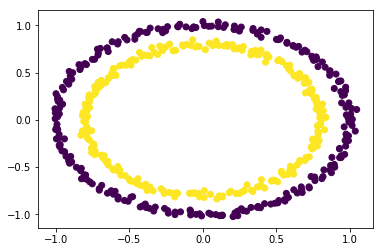

In [52]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [53]:
def non_linearity(X):
    X1=X[:,0]
    X2=X[:,1]
    X3=X1**2+X2**2
    X_new=np.zeros((X.shape[0],3))
    X_new[:,:-1]=X
    X_new[:,-1]=X3
    return X_new

In [54]:
X_new=non_linearity(X)

In [55]:
print(X_new.shape)

(500, 3)


In [73]:
def plot3d(X,show=True):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    X1=X[:,0]
    X2=X[:,1]
    X3=X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    if (show==True):
        plt.show()
    
    return ax
    

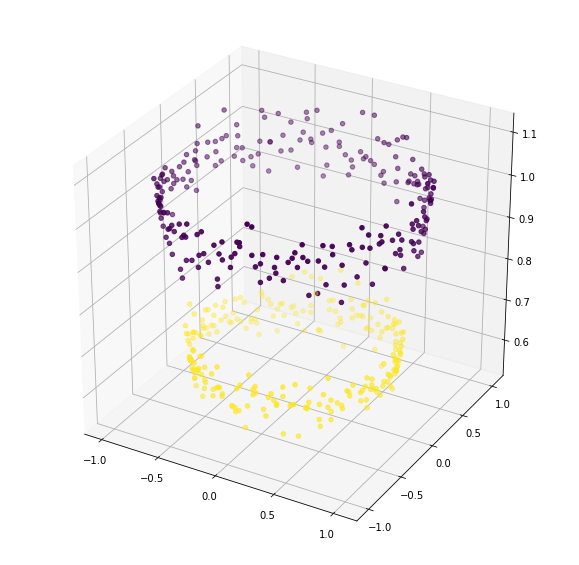

In [74]:
plot3d(X_new)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [61]:
lr=LogisticRegression()

In [62]:
acc=cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy on X(2d) {}".format(acc*100))

Accuracy on X(2d) 42.4


/home/munishgrover/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
acc=cross_val_score(lr,X_new,Y,cv=5).mean()
print("Accuracy on X(2d) {}".format(acc*100))

Accuracy on X(2d) 100.0


In [64]:
lr.fit(X_new,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
weights=lr.coef_

In [69]:
bias=lr.intercept_

In [70]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))

In [72]:
z=-(weights[0,0]*xx+weights[0,1]*yy+bias)/weights[0,2]

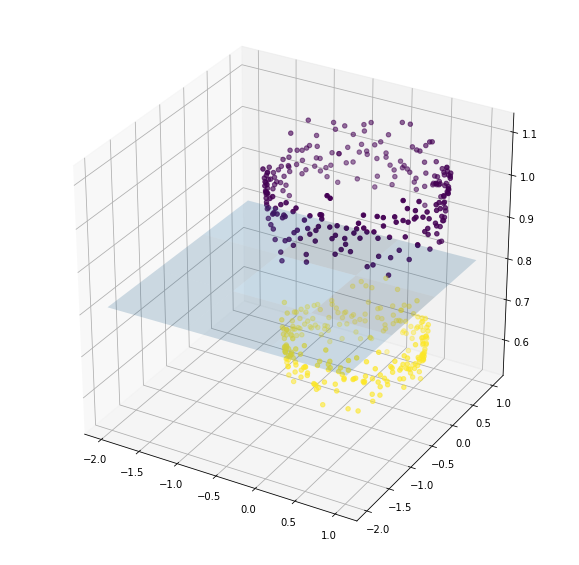

In [80]:
ax=plot3d(X_new,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()